In [1]:
# import libraries for working with arrays and DataFrames
import numpy as np
import pandas as pd
# import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
# import functions for retrieving and cleaning telco dataset
import prepare

In [3]:
# retrieve data from sql database, and clean the data
df = prepare.wrangle()

opening data from file


In [4]:
# split data into train, validate, test groups
train, validate, test = prepare.split_data(df)

In [7]:
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
1843,2676-ISHSF,Male,0,0,0,1,1,No,No internet service,No internet service,...,0,1,0,0,0,0,1,0,0,1
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,0,1,1,0,1,0,0
5210,7328-OWMOM,Female,0,0,1,31,1,No,No internet service,No internet service,...,0,1,0,1,0,0,1,1,0,0
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,1,0


In [4]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'gender_male', 'multiple_lines_no_phone_service',
       'multiple_lines_yes', 'online_security_no_internet_service',
       'online_security_yes', 'online_backup_no_internet_service',
       'online_backup_yes', 'device_protection_no_internet_service',
       'device_protection_yes', 'tech_support_no_internet_service',
       'tech_support_yes', 'streaming_tv_no_internet_service',
       'streaming_tv_yes', 'streaming_movies_no_internet_service',
       'streaming_movies_yes', 'contract_type_one_year',
       'contract_type_two_year', 'internet_service_type_fiber_optic',
       'internet_service_type_non

What percentage of customers will churn?

In [47]:
def get_pie_total():
    '''This function will display a pie chart of the total customer churn rate'''
    # create the pie chart
    plt.pie(train.churn.value_counts(), labels=("Didn't churn",'Churned'), 
            autopct='%1.1f%%', colors=('cornflowerblue', 'red'), startangle=90)
    # give the pie chart a title
    plt.title('About 26.5% of Customers Will Churn')
    # display the pie chart
    plt.show()

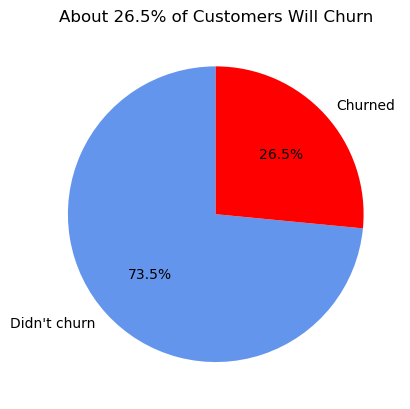

In [48]:
get_pie_total()

- Do customers with both phone services and internet service churn less than average?
- Do customers with multiple phone lines churn less than customers with phone service on average?
- Do customers churn less with online security and online backup services than customers without?
- Do customers with device protection and tech support churn less than customers without?
- Does paperless billing have an effect on customer churn rate?
- Do customers with streaming tv have a lower churn rate than those without?
- Do customers with streaming movies have a lower churn rate than those without?
- Do customers with both streaming tv and streaming movies churn at a lower rate than customers on average?
- Is there a difference in churn among genders depending on if they have streaming tv or movie streaming?

In [125]:
# Do customers with both phone services and internet service churn less than 
# customers that only have one service?

# create a variable to group customers with both service types
train['phone_and_internet'] = ((train.phone_service == 1) 
                               & (train.internet_service_type_none == 0))

def get_bar_phone_and_internet():
    '''
    This function will display a barplot of customer churn rates for customers
    who have one service type and customers who have both service types.
    '''
    # create the bar plot
    sns.barplot(data=train,
               x='phone_and_internet',
               y='churn',
               ci=False)
    # change the tick labels to something understandable
    plt.xticks(ticks=(False, True), labels=('One Service','Phone & Internet'))
    # add axis labels
    plt.xlabel('Customer Service Subscriptions')
    plt.ylabel('Customer Churn Rate')
    # add a chart title
    plt.title('Customers With Both Phone and Internet Services Have a \n\
    Higher Churn Rate Than Customers With Only One Service Type')
    # add a line showing the average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Average Churn')
    # create a legend to describe the avg churn rate line
    plt.legend()
    # show the chart
    plt.show()

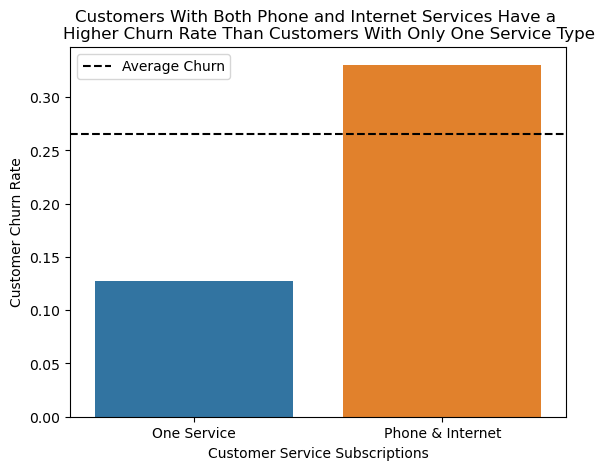

In [126]:
get_bar_phone_and_internet()

customers with phone and internet service appear to churn at a rate around 20% higher than customers with only one service.

In [77]:
internet = train[train.online_backup_no_internet_service == 0]

In [5]:
internet

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,streaming_tv_yes,streaming_movies_no_internet_service,streaming_movies_yes,contract_type_one_year,contract_type_two_year,internet_service_type_fiber_optic,internet_service_type_none,payment_type_credit_card_automatic,payment_type_electronic_check,payment_type_mailed_check
5717,8050-XGRVL,Female,0,1,1,62,1,No,Yes,No,...,0,0,0,1,0,0,0,1,0,0
1083,1576-PFZIW,Male,1,1,0,70,1,No,Yes,Yes,...,1,0,1,0,1,1,0,1,0,0
2475,3541-ZNUHK,Female,0,1,1,55,1,Yes,Yes,Yes,...,0,0,0,0,0,1,0,0,1,0
2350,3370-GQEAL,Male,0,1,1,30,1,Yes,No,No,...,1,0,0,0,0,1,0,0,1,0
2393,3422-LYEPQ,Male,0,1,1,1,1,No,No,No,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128,5839-SUYVZ,Male,0,0,0,16,1,No,No,No,...,0,0,0,0,0,1,0,1,0,0
731,1078-TDCRN,Female,1,1,0,3,0,No phone service,No,Yes,...,0,0,0,0,0,0,0,0,1,0
2272,3249-VHRIP,Female,0,0,0,62,0,No phone service,No,Yes,...,0,0,1,0,1,0,0,1,0,0
6629,9419-IPPBE,Female,0,1,1,51,1,Yes,No,No,...,0,0,1,1,0,1,0,0,1,0


# Do customers without online security or online backup have a higher churn rate than customers with at least one of these services?

H$_0$ : customers with neither online security or backup churn rate is <= than customers with one or both of these services

H$_a$ : customers with neither online security or backup churn rate is > than customers with one or both of these services

$\alpha$: 0.05   

In [139]:
train['neither_security_or_backup'] = ((train.online_backup == 'No') 
                                   & (train.online_security == 'No'))

In [129]:
internet = train[train.online_backup_no_internet_service == 0]

In [178]:
def get_bar_security_or_backup():
    ''' 
    This function will display a bar plot showing the churn rate of customers 
    who have security or backup services and customers who have neither service
    '''
    # create a bar plot
    sns.barplot(data=train,
                x='neither_security_or_backup',
                y='churn',
                ci=False)
    # create a line showing the total average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
    # display a legend describing the average churn line
    plt.legend()
    # change the axis labels
    plt.ylabel('Customer Churn Rate')
    plt.xlabel('Security or Backup Subscription')
    # change the description for each bar
    plt.xticks(ticks=(False, True), labels=('Has At Least One Service',
                                            'Has Neither Service'))
    # add a title for the chart
    plt.title('Customers With Neither Internet Security or Online Backup Services\n\
    Have a Higher Churn Rate Than Customers With At Least One Service')
    plt.show()

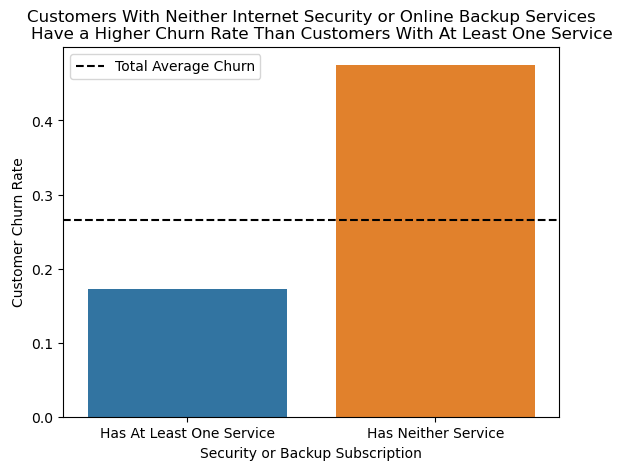

In [179]:
get_bar_security_or_backup()

In [175]:
# check if variances are equal
# h_0: variances are equal
# h_a: variances are not equal
# alpha: 0.05
nsob_churn = train[train['neither_security_or_backup']].churn
stats.levene(nsob_churn, train.churn)

LeveneResult(statistic=196.99161837383792, pvalue=6.047153239108099e-44)

The p-value of the variance test is less than our alpha. Therefore we have evidence that the variances are not equal.

In [173]:
def get_ttest_neither_security_or_backup():
    '''
    This function will perform a t-test on the sample of customers who do not have either
    online security or backup services, compared to the churn rate of all customers
    '''
    # set the alpha score
    alpha = 0.05
    # get the churn rate of customer subset that we are looking at
    nsob_churn = train[train['neither_security_or_backup']].churn
    one_sob_churn = train[train[~'neither_security_or_backup']].churn
    # run the t-test on our sample compared to the total churn rate
    t_stat, p = stats.ttest_ind(nsob_churn, 
                                train.churn, equal_var=False)
    # a t-stat > 0 and p / 2 < alpha will indicate that having neither security
    # or backup services has a higher churn rate than customers with at least one service
    print(f'T_stat is greater than 0: {t_stat > 0}, T_stat = {t_stat:.6}')
    print(f'p-value / 2 is less than alpha: {p / 2 < alpha}, p-value / 2 = {p/2:.6}')

In [174]:
get_ttest_neither_security_or_backup()

T_stat is greater than 0: True, T_stat = 13.1502
p-value / 2 is less than alpha: True, p-value / 2 = 4.11937e-38


In [182]:
train[train['neither_security_or_backup']].churn.mean() - train.churn.mean()

0.21000805966070873

In [113]:
## incorrect test
def get_chi_security_or_backup():
    '''
    This function will print the chi^2 score and p-value for the chi-squared test for
    churn rate of customers with neither online security or online backup 
    services to customer average churn rate
    '''
    # perform chi-squared test
    chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(
        train.neither_security_or_backup, train.churn))
    # print resulting chi^2 and p values
    print(f'chi^2: {chi2:.6}')
    print(f'p-value: {p:.6}')

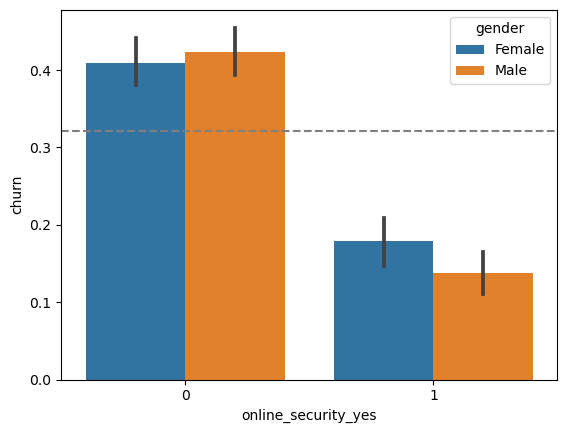

In [27]:
sns.barplot(data=internet,
            x='online_security_yes',
            y='churn',
           hue='gender')
plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

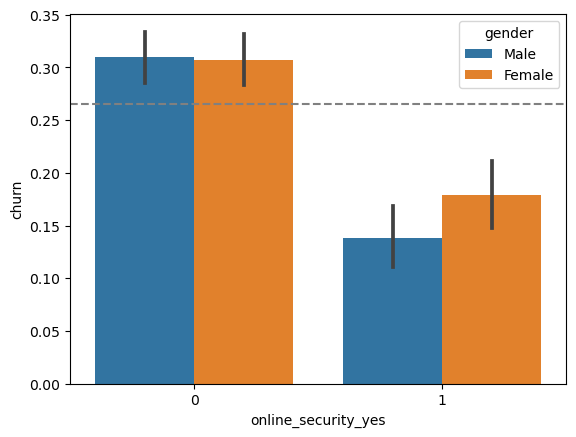

In [75]:
sns.barplot(data=train,
            x='online_security_yes',
            y='churn',
           hue='gender')
plt.axhline(train.churn.mean(), ls='--', color='gray')
plt.show()

In [110]:
t_stat, p = stats.ttest_ind(internet.security_and_backup, internet.churn)

In [131]:
if p < alpha:
    print('We are able to Reject our null hypothesis')
    print(f'p value is: {p}')
    print(f'the t-stat is: {t_stat}')
else:
    print('we Fail to reject our null hypothessis')
    print(f'p value is: {p}')

We are able to Reject our null hypothesis
p value is: 2.024356464381301e-25
the t-stat is: -10.466140200306429


In [8]:
# Do customers with device protection and tech support churn less than customers with?
internet['protection_and_tech'] = ((internet.device_protection_yes == 1) 
                        & internet.tech_support_yes == 1)

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1288/2255880114.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet['protection_and_tech'] = ((internet.device_protection_yes == 1)


In [9]:
internet['neither_protection_or_tech'] = ((internet.device_protection_yes == 0) 
                        & internet.tech_support_yes == 0)

/var/folders/49/v6sf5vy165dghytk4qv6jfhc0000gn/T/ipykernel_1288/3475794252.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  internet['neither_protection_or_tech'] = ((internet.device_protection_yes == 0)


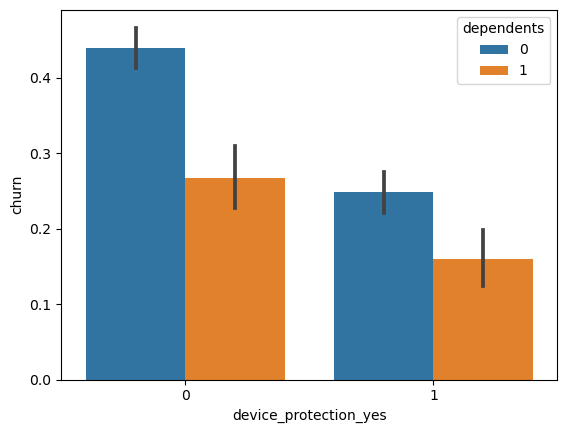

In [192]:
sns.barplot(data=internet,
            x='device_protection_yes',
            y='churn',
            hue='dependents')
plt.show()

## 3. Do customers with tech support service have a lower churn rate than customers on average?

In [189]:
def get_bar_tech_support():
    '''
    This function will display a bar graph of the churn rate of customers who have tech
    support service and customers who do not.
    '''
    # create the bar chart
    sns.barplot(data=train,
                x='tech_support_yes',
                y='churn',
                ci=False)
    # change the xtick labels to understandable text
    plt.xticks(ticks=(0,1), labels=('No Tech Support', 'Has Tech Support'))
    # create x and y axis labels
    plt.xlabel('Customers With or Without Tech Support')
    plt.ylabel('Customer Churn Rate')
    # create a chart title
    plt.title('Customers With Tech Support Have a Lower Churn Rate\n\
    Than Customers Without Tech Support')
    # create a line showing the overall average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
    # add a legend describing the average churn rate line
    plt.legend()
    # show the chart
    plt.show()

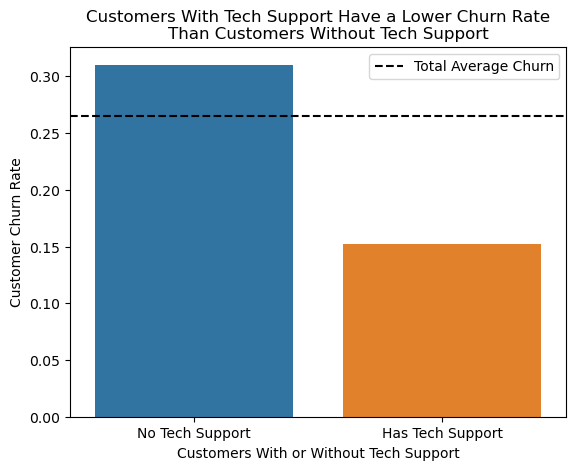

In [190]:
get_bar_tech_support()

# Do customers with tech support service have a lower churn rate than customers without it?

H$_0$ : Customers with tech support have a churn rate >= than customers without it

H$_a$ : Customers with tech support have a churn rate < than customers without it

$\alpha$: 0.05   

In [223]:
def get_ttest_tech_support():
    '''
    This function will perform a t-test on the sample of customers who have tech support
    compared to the churn rate of all customers.
    '''
    # set the alpha score
    alpha = 0.05
    # get the churn rate of customer subset that we are looking at
    tech_churn = train[train['tech_support_yes'] == 1].churn
    # run the t-test on our sample compared to the total churn rate
    t_stat, p = stats.ttest_ind(tech_churn, 
                                train.churn, equal_var=False)
    # a t-stat < 0 and p / 2 < alpha will indicate that customers with tech support service
    # have a lower churn rate than customers without it
    print(f'T_stat is less than 0: {t_stat < 0}, T_stat = {t_stat:.6}')
    print(f'p-value / 2 is less than alpha: {p / 2 < alpha}, p-value / 2 = {p/2:.6}')

In [224]:
get_ttest_tech_support()

T_stat is less than 0: True, T_stat = -8.83338
p-value / 2 is less than alpha: True, p-value / 2 = 1.02531e-18


In [226]:
train.churn.mean() - train[train['tech_support_yes'] == 1].churn.mean()

0.1133588851137648

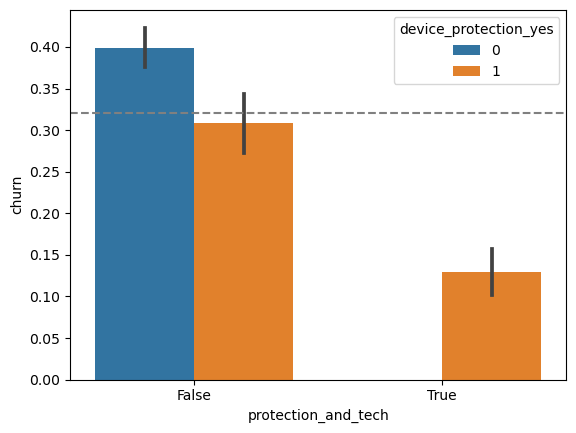

In [11]:
sns.barplot(data=internet,
            x='protection_and_tech',
            y='churn',
            hue='device_protection_yes')
plt.axhline(internet.churn.mean(), ls='--', color='gray')
plt.show()

In [22]:
prot_and_tech = pd.crosstab(internet.protection_and_tech, internet.churn)
prot_and_tech

churn,0,1
protection_and_tech,,
False,1505,896
True,573,85


In [21]:
stats.chi2_contingency(prot_and_tech)

(140.02453347370852,
 2.6293526810820914e-32,
 1,
 array([[1631.01601831,  769.98398169],
        [ 446.98398169,  211.01601831]]))

In [175]:
pd.crosstab(train.online_backup, train.churn)

churn,0,1
online_backup,,
No,1040,689
No internet service,819,65
Yes,1038,292


In [174]:
# Does paperless billing have an effect on customer churn rate?
pd.crosstab(train.paperless_billing, train.churn)

churn,0,1
paperless_billing,,
0,1357,256
1,1540,790


In [23]:
stats.chi2_contingency(pd.crosstab(train.paperless_billing, train.churn))

(158.13079744599034,
 2.897751597290523e-36,
 1,
 array([[1185.10296728,  427.89703272],
        [1711.89703272,  618.10296728]]))

In [ ]:

# Do customers with both streaming tv and streaming movies churn at a lower rate than customers on average?

In [249]:
def get_bar_dependents():
    '''
    This function will display a visualization for customer churn rate based on if
    the customer has dependents or not.
    '''
    # Does a customer having dependents change the rate of customer churn?
    # create the bar graph
    sns.barplot(data=train,
                x='dependents',
                y='churn',
                ci=False)
    # change the xticks to something understandable
    plt.xticks(ticks=(0,1), labels=('No Dependents', 'Has Dependents'))
    # change the axis labels
    plt.xlabel('Customer Dependents')
    plt.ylabel('Customer Churn Rate')
    # create a title for the graph
    plt.title('Customers With Dependents Have a Lower Churn Rate')
    # create a line showing the total average churn rate
    plt.axhline(train.churn.mean(), ls='--', color='black', label='Total Average Churn')
    # create a legend explaining the avg churn rate line
    plt.legend()
    # show the graph
    plt.show()

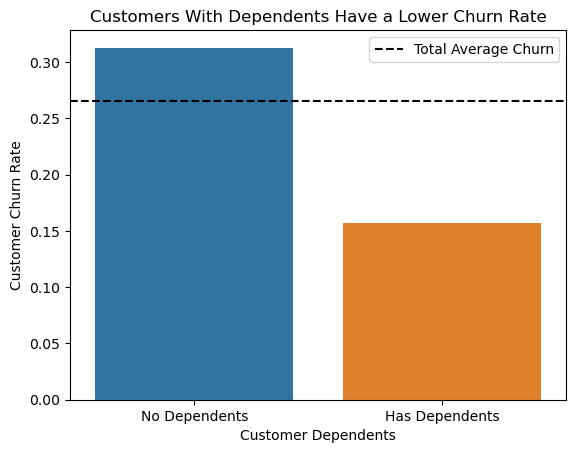

In [250]:
get_bar_dependents()

In [252]:
train.churn.mean() - train[train['dependents'] == 1].churn.mean()

0.10804230669739293

<AxesSubplot:xlabel='streaming_tv', ylabel='churn'>

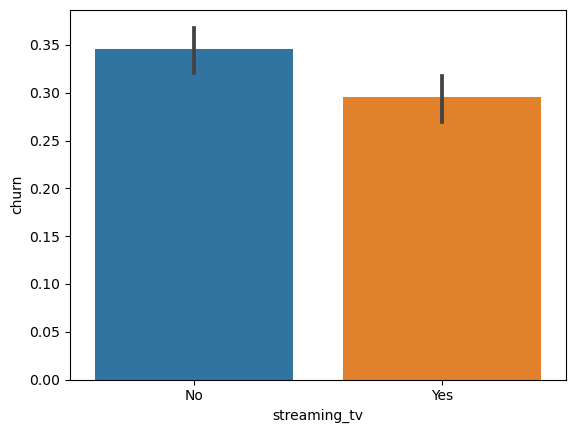

In [245]:
# Do customers with streaming tv have a lower churn rate than those without?
sns.barplot(data=internet,
                x='streaming_tv',
                y='churn')

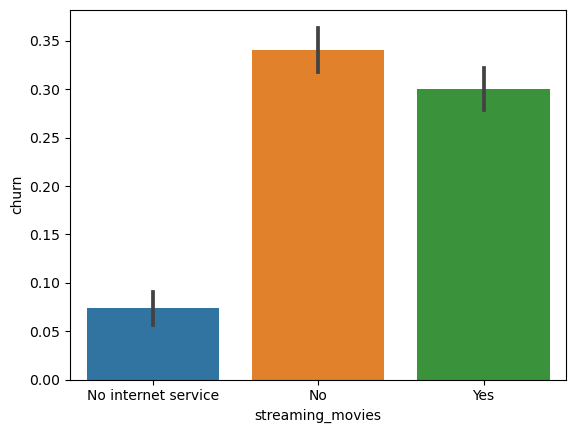

In [22]:
# Do customers with streaming movies have a lower churn rate than those without?
sns.barplot(data=train,
                x='streaming_movies',
                y='churn')
plt.show()

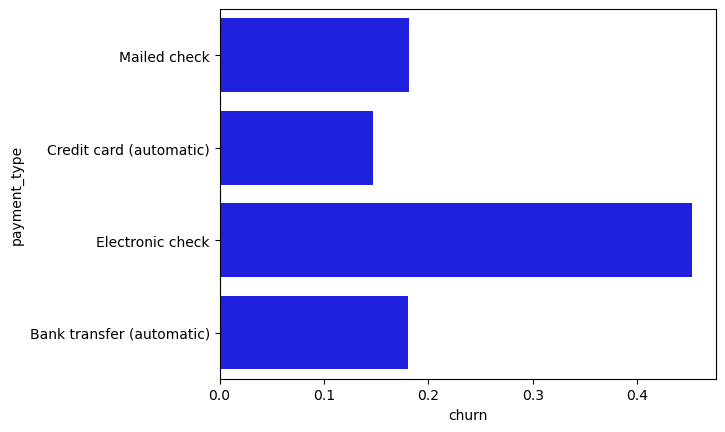

In [20]:
# does payment method affect churn rate?
sns.barplot(data=train,
           y='payment_type', color=('blue'),
           x='churn',
           ci=False)
plt.show()

In [ ]:
# Does contract type affect churn rate?
sns.barplot()